In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diabetes.csv')
#check data has been read in properly
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#create a dataframe with all training data except the target column
X = np.array(df.drop(columns=['Outcome']))

In [3]:
#separate target values
Y = np.array(df['Outcome'].values)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
# Create KNN classifier
cv = KFold(n_splits=10, random_state=1, shuffle=True)
CVAccuracy=[]
for train_index, validation_index in cv.split(x_train):
    X_train_v, X_valid, Y_train_v, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    knn = KNeighborsClassifier(n_neighbors = 12)
    # Fit the classifier to the data
    knn.fit(X_train_v,Y_train_v)
    CVAccuracy.append([knn.score(X_valid, Y_valid)])
df = pd.DataFrame (CVAccuracy,columns=['Validation Accuracy'])
print(df)

   Validation Accuracy
0             0.774194
1             0.725806
2             0.887097
3             0.645161
4             0.704918
5             0.770492
6             0.737705
7             0.688525
8             0.803279
9             0.688525


In [6]:
TenfoldCVError = df.mean()
TenfoldCVError

Validation Accuracy    0.74257
dtype: float64

In [7]:
CVAccuracy=[]
for train_index, validation_index in cv.split(x_train):
    X_train_v, X_valid, Y_train_v, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    for j in range(1,26):
        knn = KNeighborsClassifier(n_neighbors = j)
        # Fit the classifier to the data
        knn.fit(X_train_v,Y_train_v)
        CVAccuracy.append([knn.score(X_valid, Y_valid),j])
    df = pd.DataFrame (CVAccuracy,columns=['Validation Accuracy','NeighbourSize'])
print(df)

     Validation Accuracy  NeighbourSize
0               0.741935              1
1               0.725806              2
2               0.677419              3
3               0.741935              4
4               0.758065              5
..                   ...            ...
245             0.655738             21
246             0.639344             22
247             0.672131             23
248             0.655738             24
249             0.672131             25

[250 rows x 2 columns]


In [8]:
kfoldCV = df.groupby("NeighbourSize")
kfoldCV = kfoldCV.mean()
kfoldCV = kfoldCV.reset_index()
kfoldCV[['NeighbourSize', 'Validation Accuracy']]


,NeighbourSize,Validation Accuracy
0,1,0.690534
1,2,0.713247
2,3,0.672554
3,4,0.729588
4,5,0.700317
5,6,0.726335
6,7,0.718112
7,8,0.716552
8,9,0.726282
9,10,0.739318


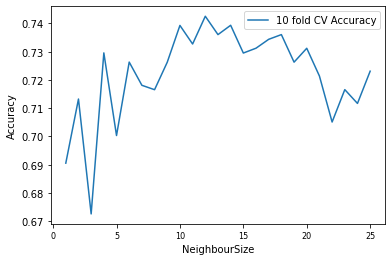

In [9]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV['NeighbourSize'].values,kfoldCV['Validation Accuracy'].values,label = '10 fold CV Accuracy')
ax.set_xlabel('NeighbourSize')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())

0.7638815441565309


In [13]:
CVAccuracy=[]
for j in range(1,26):
    knn = KNeighborsClassifier(n_neighbors = j)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    CVAccuracy.append([scores.mean(),j])
df = pd.DataFrame (CVAccuracy,columns=['Validation Accuracy','NeighbourSize'])
print(df)

    Validation Accuracy  NeighbourSize
0              0.664595              1
1              0.692306              2
2              0.700370              3
3              0.715071              4
4              0.731306              5
5              0.724855              6
6              0.723268              7
7              0.737916              8
8              0.737969              9
9              0.742808             10
10             0.755791             11
11             0.763882             12
12             0.759069             13
13             0.763882             14
14             0.755738             15
15             0.760682             16
16             0.744315             17
17             0.750873             18
18             0.749233             19
19             0.749313             20
20             0.746034             21
21             0.755817             22
22             0.749207             23
23             0.759096             24
24             0.752538  

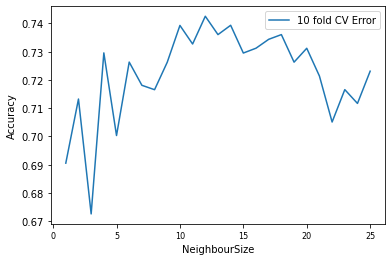

In [14]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV['NeighbourSize'].values,kfoldCV['Validation Accuracy'].values,label = '10 fold CV Error')
ax.set_xlabel('NeighbourSize')
ax.set_ylabel('Accuracy')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [15]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7207792207792207

In [16]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)